In [3]:
import torch
from torchvision import models

# Load pre-trained ResNet-18
model = models.resnet18(pretrained=True)

# Modify the final layer for 7 classes
num_classes = 7
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

# Switch to training mode
model.train()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 195MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [2]:
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the final layer
for param in model.fc.parameters():
    param.requires_grad = True


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile
import os

# Path to the uploaded zip file in Google Drive
zip_path = '/content/drive/MyDrive/archive (2).zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Check the extracted files
os.listdir('/content/dataset')

['train', 'test']

Using device: cuda
Epoch [1/30], Loss: 1.3173, Train Accuracy: 0.5028, Test Accuracy: 0.4986
Epoch [2/30], Loss: 1.1484, Train Accuracy: 0.5723, Test Accuracy: 0.5474
Epoch [3/30], Loss: 1.0955, Train Accuracy: 0.5920, Test Accuracy: 0.6137
Epoch [4/30], Loss: 1.0493, Train Accuracy: 0.6114, Test Accuracy: 0.5981
Epoch [5/30], Loss: 1.0184, Train Accuracy: 0.6186, Test Accuracy: 0.6021
Epoch [6/30], Loss: 0.9872, Train Accuracy: 0.6297, Test Accuracy: 0.6096
Epoch [7/30], Loss: 0.9427, Train Accuracy: 0.6484, Test Accuracy: 0.6108
Epoch [8/30], Loss: 0.9091, Train Accuracy: 0.6605, Test Accuracy: 0.6252
Epoch [9/30], Loss: 0.8709, Train Accuracy: 0.6735, Test Accuracy: 0.6275
Epoch [10/30], Loss: 0.8256, Train Accuracy: 0.6925, Test Accuracy: 0.6402
Epoch [11/30], Loss: 0.7879, Train Accuracy: 0.7036, Test Accuracy: 0.6379
Epoch [12/30], Loss: 0.7402, Train Accuracy: 0.7277, Test Accuracy: 0.6388
Epoch [13/30], Loss: 0.7044, Train Accuracy: 0.7412, Test Accuracy: 0.6425
Epoch [14/30], 

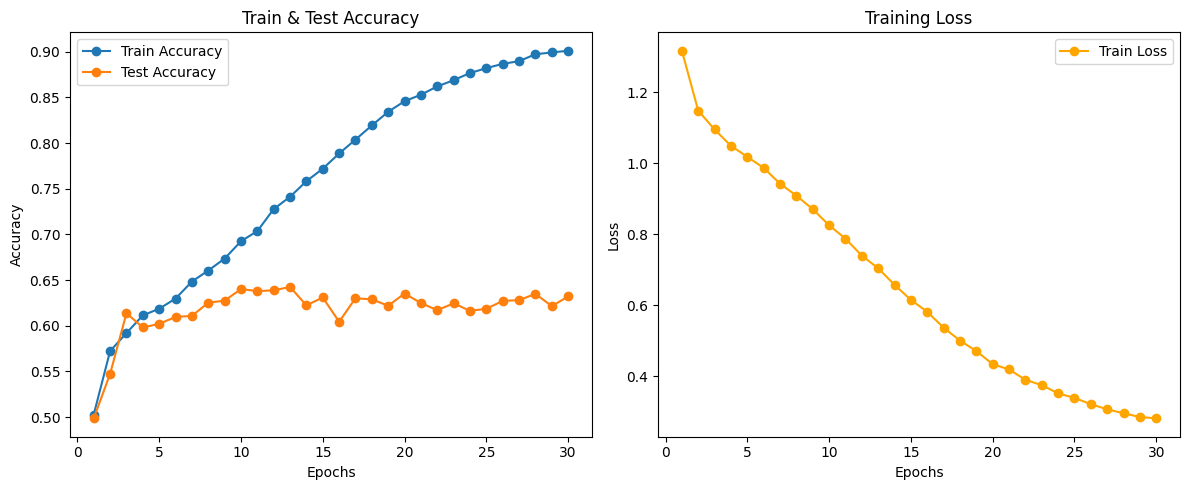

Model saved to /content/drive/MyDrive/resnet18_with_dropout.pth


In [9]:
import torch
from torch import nn, optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import os

# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define transforms for train and test sets
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = ImageFolder('/content/dataset/train', transform=train_transforms)
test_dataset = ImageFolder('/content/dataset/test', transform=test_transforms)

# Create dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load pre-trained ResNet-18 and modify it with Dropout
num_classes = 7
dropout_rate = 0.5

model = models.resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Dropout(p=dropout_rate),  # Dropout layer
    nn.Linear(model.fc.in_features, num_classes)  # Fully connected layer
)
model = model.to(device)

# Load saved weights 
saved_weights_path = '/content/drive/MyDrive/resnet18_final_weights.pth'

# Define loss function and optimizer with L2 regularization
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 penalty via weight_decay

# Function for training and evaluation
def train_with_regularization(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    train_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        # Training mode
        model.train()
        running_loss = 0.0
        correct, total = 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        # Evaluation mode
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_acc = correct / total
        test_accuracies.append(test_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, "
              f"Train Accuracy: {epoch_acc:.4f}, Test Accuracy: {test_acc:.4f}")

    return train_losses, train_accuracies, test_accuracies

# Train the model
num_epochs = 30
train_losses, train_accuracies, test_accuracies = train_with_regularization(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=num_epochs
)

# Plot training loss and accuracy
def plot_metrics(train_losses, train_accuracies, test_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Plot training and test accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
    plt.title('Train & Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_losses, label='Train Loss', marker='o', color='orange')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot metrics
plot_metrics(train_losses, train_accuracies, test_accuracies)

# Save the model
model_save_path = '/content/drive/MyDrive/resnet18_with_dropout.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")
